Module : <b>IMAGE PROCESSING </b><br> Projet : <b>Face recognition using yale faces data set </b><br> done by  : <b> CHEBOUTI Boutheina and NACEREDDINE Douni Amira </b><br> Classe : <b>2 DSIA</b>  

**Preprocessing** 

1. Rajouter l’extension « .gif » aux 165 images de la base.
3. Créer 15 dossiers, ou chaque dossier contient les 11 images de chaque personne.

In [ ]:
import os
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import numpy as np
from PIL import Image as im
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data import DataLoader, random_split
from torchvision import transforms, datasets
from torch.utils.data import Dataset


data_path = r'C:\Users\benz\Desktop\TIM\faceRec\yalefaces' #specifying the path of the dataset
save_path = r'C:\Users\benz\Desktop\TIM\faceRec\preprocessing'#the patg of the dataset after preprocessing

#Changing the files format to .gif 
for file_name in os.listdir(data_path): #Returns a list of files in the specified directory 
    if not 'gif' in file_name and not 'txt' in file_name and not 'DS_Store' in file_name:
      image = Image.open(data_path + '/' + file_name)
      subject_num = file_name.split('.')[0]
      #Adding the . gif extension into every image 
      img_path = save_path + '/' + subject_num + '/' + file_name + '.gif'
      if not os.path.isdir(save_path + '/' + subject_num):
       os.mkdir(save_path + '/' + subject_num)
      if not os.path.isfile(img_path):
             image.save(img_path)
    else:
         print("Already Completed")

Already Completed


in this section of the code, we created a new directory called preprocessing that contains 15 files ( subject01, subject02,...subject15) and each file contains the 11 images of the same person, with the extension .gif

**2-Face detection** 


In [ ]:
face_cascade=cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_frontalface_default.xml") 
data_path=r'preprocessing'
new_path = 'Cropped'           #this is the path of the new directory containing the cut images, each one containing the face only
for file_name in os.listdir(data_path):
    p = os.makedirs(new_path+'/'+file_name)  
    for image in os.listdir(data_path+'/'+file_name):
        gray = plt.imread(data_path+'/'+file_name+'/'+image) # we read the image with the imread() methode 
        faces = face_cascade.detectMultiScale(gray, 1.1 , 5)  # with the method detectemultiscale() implimated withe the cascadeclassifier we detect the face in the image
        print('Faces found: ', len(faces))
        x=faces[0][0]
        y=faces[0][1]
        w=faces[0][2]
        h=faces[0][3]
        cv.rectangle(gray, (x,y), (x+w, y+h), (0,0,0), 2)
        crop=gray[y:y+h,x:x+w] # we cut the image and we leave the face part only
        cv.imwrite(new_path+'/'+file_name+'/'+image+'.png',crop )  # we save the cut image into the new file 

Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces found:  1
Faces fo

**4-HOG Features generation foe the rescaled images**

In [ ]:
Hog_features = [] #creating a list to store the hog features
hog_images = [] # storing the gradient images in a list 
new_path = 'Cropped'


 
#selecting the subject files (15 file )
for file_name in os.listdir(new_path): 
    #selecting the diffrent images in each file wich are 11 per file 
    for image in os.listdir(new_path+'/'+file_name):
       im =plt.imread(new_path+'/'+file_name+'/'+image)
       fd,hog_image= hog(im,orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True, multichannel=True)
       Hog_features.append(fd)
       hog_images.append(hog_image)
Hog_features = np.array(Hog_features) # changing the list into a numpy array to facilitate manipulation 
print ("the number of feautures generated is : " + str (Hog_features.shape [1])) # returns the number of features generated 



C:\Users\benz\AppData\Local\Temp\ipykernel_8608\3981805224.py:12: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd,hog_image= hog(im,orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True, multichannel=True)
C:\Users\benz\AppData\Local\Temp\ipykernel_8608\3981805224.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Hog_features = np.array(Hog_features) # changing the list into a numpy array to facilitate manipulation


**Example of a hog image** 

[0.48043427 0.06730545 0.1657829  ... 0.01947322 0.08739826 0.05305542]


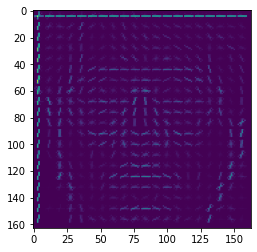

In [ ]:
plt.imshow(hog_images[1]) #displaying an example 
print(Hog_features[1])

**5-Labeling the data and creating the dataset**          

In [ ]:
import pandas as pd 
Hog_features= pd.DataFrame(Hog_features)
#labeling the dataset and associating each vector to its class 
labels=[]
i=0
k=0
j=0
while i <15:
    k=k+1
    j=0
    while j<11:
        labels.append('Subject'+str(k))
        j=j+1
    i=i+1
Hog_features['Subject']=labels
#creating the final labeled  data frame 
pd.DataFrame(Hog_features)


,0,Subject
0,"[0.49318445, 0.0, 0.12866072, 0.0011041821, 0....",Subject1
1,"[0.48043427, 0.06730545, 0.1657829, 0.00585134...",Subject1
2,"[0.48521033, 0.05485054, 0.15264499, 0.0, 0.48...",Subject1
3,"[0.49201548, 0.013901016, 0.13089551, 0.0, 0.4...",Subject1
4,"[0.47024348, 0.092222616, 0.14306247, 0.017160...",Subject1
...,...,...
160,"[0.49528933, 0.0031517574, 0.12857084, 0.0, 0....",Subject15
161,"[0.49485794, 0.0064619742, 0.12699871, 0.0, 0....",Subject15
162,"[0.4063907, 0.0, 0.0917568, 0.0, 0.4063907, 0....",Subject15
163,"[0.4405262, 0.06892504, 0.09576854, 0.00080489...",Subject15


It was mentioned that we should use 6 vectors for each images which will take 90 vector for training and 75 for testing , if we use the train test split method directly it will take a random number from each class which will affect the performance of the model, so we had to extract 6 vectors from each class alone then merge then to be the training and testing data .    

In [ ]:
from sklearn.model_selection import train_test_split
# we needed to create a code that takes 5 vectors for training from each class 
# if used the train_test_split function directly it will take a random number from each class wich will affect the models accuracy later 
X_train=pd.DataFrame()
Y_train=pd.DataFrame()
X_test=pd.DataFrame()
Y_test=pd.DataFrame()
clss=''
for classe1 in labels:
  if (clss != classe1) : 
    clss=classe1
    datafram=pd.DataFrame()
    datafram=Hog_features.loc[Hog_features['Subject']==classe1]
      
    x=datafram.drop(['Subject'],axis=1)
    y=datafram['Subject']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=5/11,random_state=42)
  
    X_train=pd.concat([X_train,x_train])
    Y_train=pd.concat([Y_train,y_train])
    X_test= pd.concat([X_test,x_test])
    Y_test= pd.concat([Y_test,y_test])


   
#print(Y_test)
#print(Y_train) 

6.KNN                                                                    
a. Comparing the the diffrent parameters of the KNN classifier  (Euclidienne, Manhattan et
Canberra), (k=1,3,5,7 et 9)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
from sklearn.metrics import f1_score

i=1
j=1
f1_score_ = [] #this is a list that is will contain the F1 score for each configuration of the k value and the kind of distance
accuracy__=[]
X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_test=np.array(X_test)
Y_test=np.array(Y_test)

while i<4  :
    j=1
    while j <10:
        # j is for the number of neighbors 
        #p to specifiy the used distance  1= manhattan , 2 =euclidien, 3=canberra
        Classifier = KNeighborsClassifier(n_neighbors = j, p = i)
        

        Classifier.fit(X_train,Y_train)
        y_predict = Classifier.predict(X_test)
        #using the f1 score instead of accuracy to avoid overfitting when the accuracy is high 
        f1_score_.append(metrics.f1_score(Y_test, y_predict,average="micro"))
        accuracy__.append(metrics.accuracy_score(Y_test, y_predict))
        j=j+2
    i=i+1





** to measure **the performance** between the models we need to calculate some *metrics* such us *precision*, *accuracy* score or the *f1 score* ...ect, here we are going to use the accuracy and f1 score because we are inetrested in seeing how much are close the true values and predicted values tp each others, 


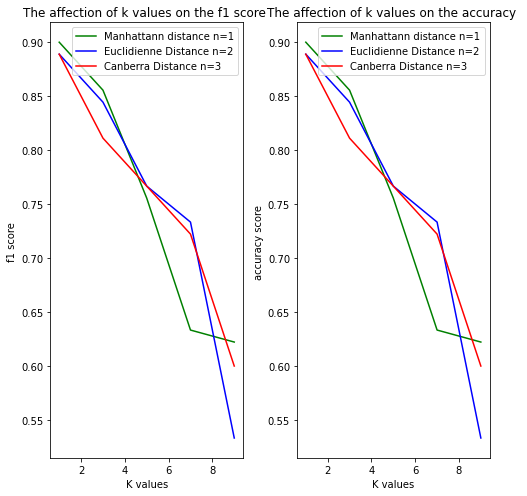

In [ ]:
fig = plt.figure(figsize=(7,7))
fig.add_subplot(1,2,1)
plt.plot(range(1,10,2),[f1_score_[0],f1_score_[1],f1_score_[2],f1_score_[3],f1_score_[4]],'g', label='Manhattann distance n=1')
plt.plot(range(1,10,2),[f1_score_[5],f1_score_[6],f1_score_[7],f1_score_[8],f1_score_[9]],'b', label='Euclidienne Distance n=2')
plt.plot(range(1,10,2),[f1_score_[10],f1_score_[11] ,f1_score_[12],f1_score_[13],f1_score_[14]],'r', label='Canberra Distance n=3')
plt.title("The affection of k values on the f1 score ")
plt.legend(loc="upper right")
plt.ylabel("f1 score ")
plt.xlabel("K values")
plt.tight_layout()
fig.add_subplot(1,2,2)
plt.plot(range(1,10,2),[accuracy__[0],accuracy__[1],accuracy__[2],accuracy__[3],accuracy__[4]],'g', label='Manhattann distance n=1')
plt.plot(range(1,10,2),[accuracy__[5],accuracy__[6],accuracy__[7],accuracy__[8],accuracy__[9]],'b', label='Euclidienne Distance n=2')
plt.plot(range(1,10,2),[accuracy__[10],accuracy__[11] ,accuracy__[12],accuracy__[13],accuracy__[14]],'r', label='Canberra Distance n=3')
plt.title("The affection of k values on the accuracy ")
plt.legend(loc="upper right")
plt.ylabel("accuracy score ")
plt.xlabel("K values")
plt.tight_layout()
plt.show()


-We notice that the **accuracy and the f1 score are equal**  this is  because we are dealing with a multi class classification , where every **test data should belong to only 1 class** and not multi label , in such case where there is no TN , we can call True Negatives as True Positives.

Comments : 
- we can say that the euclidian and the manhattann distance are performing similarly and the results obtained with both distances are close.
- we can say that the manhattann distance is the best and has the best accuracy score for all the values of k compared to the other distances
- we notice that the f-1 score  goes down when k is augmented, and the best accuracy score for the 3 distances is when the k=1
even Though it can lead to **underfitting** which means that our model is so simple compared to the data we have and it cant capture the relationship that exists between units .

Conclusion : The best accuracy score is obtained with  k is set to 1 for manhattan distance 

b. Confusion matrix analysis :

Confusion matrix 

In [ ]:
voisin = KNeighborsClassifier(n_neighbors = 1, p = 1).fit(X_train,Y_train)
y_predict = voisin.predict(X_test)

c:\Users\benz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


accuracy0.9333333333333333


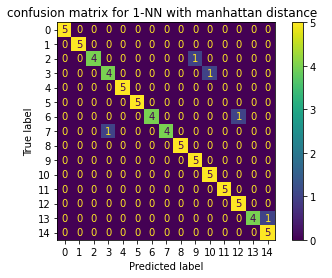

In [ ]:
import seaborn as sns
print("accuracy"+ str(metrics.accuracy_score(Y_test, y_predict)))
confusion_matrix = metrics.confusion_matrix(Y_test, y_predict)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.title("confusion matrix for 1-NN with manhattan distance  ")

plt.show()

comments:
- we can see through the confusion matrix that almost all the results are correctly predicted, for example, the 5 images from the first class were all correctly predicted.
- the total of the wrong predicted results is 5, there is 5 images that were wrongly predicted for example, there is 1 image of the class 8 .
- for example the subject 11(class 10 in the confusion matrix ) was predicted correctly each tile to be the subject 11 because it is a woman so the features were pretty clear and distinctive 


RNM

**A-Defining the architechture of the neural network :** 

 *input layer* 11664 ( number of features)

 *number of hidden layers* : as we have a modest number of values to be trained(165) 2 hidden layers should be enough for the training and prediction process

 *number of nodes at each hidden layer* : for a modest amount of data the number of the nodes should not exced the number of nodes in the input layer, after tryung multiple values to get the precision needed we ended up choosing 100 node for the first layer and 78 node for the second 
 
 *nodes of the output layer* : 15 node ( number of classes )


 
**B-Defining the parameters** :

 first we aimed to use the parameters seen inbthe course ( gradient descent and sigmoid activation function ) but the loss was decreasing very slowly (less than 0.0001 after 10 iterations ), and the number of iterations was reached without converging enough, so we tried the ReLu acctivation function (If the input value is 0 or greater than 0, the ReLU function outputs the input as it is. If the input is less than 0, the ReLU function outputs the value 0.) wich is similar to the sigmoid function but convergence of ReLU is 6 times faster than sigmoid functions.

for the **solver**, after diging deeper in the mlp parameters it was shown that the aAdam optimizer gives much higher performance results than the other optimizers and outperforms by a big margin for a better-optimized gradient.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [ ]:
    #creating the model and setting the parameters 
    classifier = MLPClassifier( hidden_layer_sizes = (100,78),max_iter= 1000, activation= 'relu',solver='adam',random_state=762, learning_rate= 'invscaling',alpha=0.001)
    classifier.fit(X_train,Y_train) 
    y_predict_mlp = classifier.predict(X_test)
    score = np.round(metrics.accuracy_score(Y_test,y_predict_mlp),2)
    print('mean accuracy score :'+str(score))




c:\Users\benz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean accuracy score :0.95


a. Analyser la matrice de confusion pour la meilleure précision obtenue.

0.95


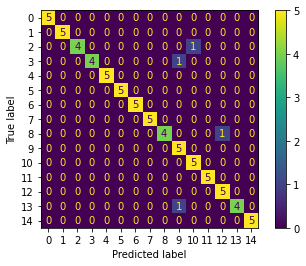

In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_test, y_predict_mlp)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
print (np.round(metrics.f1_score(Y_test, y_predict_mlp,average="micro"),2))
cm_display.plot()
plt.show()

- wwe can see that the diagonals of tge matrix are highlighted which shows the good performance of the model, almost all result are well predicted, except 4 images that was not correctly classified

**8-KNN vs  RNM**

Comparaison of the two classification approches 
- the KNN classifier generated an accuracy score of 0.93 which is a good score, but it lead us to underfitting and the model didnt learn well enough from the given data 
- the RNM classifier has an accuracy score better than the Knn classifier :0.95 and almost all images were classified in the desired class 
- we can say that the RNM classifier is better than the KNN classifier in terms of accuracy and F1 score
- the parameters that has in impact on the performace of the KNN algorithm are the type of distance and the number of neighbours
- the parameters that has in impact on the performace of the RNM classifier are the number of the hidden layers, the type of the activation function and the type of solver, it is trained based on the Backpropagation and the weights are modified each time the error is calculated, and they keep changing until a certain iteration and the cost function converge to its minimum local.

**9.Non correctly classified image and the reasons why**

for the KNN algorithm:
- there is 5 images that were not correctly predicted, one image of the 3rd, 4th, 7th, 8th, and the 14th class, these images were not preprocessed in a good way which lead to wrong classification and the KNN model couldnt learn from them.
- the images that were not correctly classified were classified in a subject that have a similar features ( for example the subject 9 and 13 both have mustaches so the vectors might have close values wich leads to misclassifying, ) 
- the subjects that were misclassified, their face features were a lot diffrent under diffrent lighting, the beard for men can also be misleading as it generates close values for diffrent person, thats why we see women and subjects with no beard are correctly classified compared to others, and all of this can change depending on the performance of the model as we see 


for the RNM algorithm :
- there is 4 images that werent correctly predicted, even to the preprocessing, and the data given  for the 2 models was the same but the RNM showed a better performance and classified these images correctly, and wasnt confused by other features 


10. Faire des propositions/ suggestions pour améliorer les performances atteintes.

We can improve the performance of these models, through:

- choose the better values for the parameters (the number of hidden layers for the MLP and the K for the KNN), as well as the learning rate.
- Provide more data samples.
- normalise our data to have them on the same scale.
- Examine the learning curve to see if the algorithm used over-learns (overfitting) or under-learns (underfitting) the problem studied